In [20]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [21]:

def prepare_data(df,forecast_col,forecast_out,test_size):
    label = df[forecast_col].shift(-forecast_out) #creating new column called label with the last 5 rows are nan
    X = np.array(df[[forecast_col]]) #creating the feature array
    X = preprocessing.scale(X) #processing the feature array
    X_lately = X[-forecast_out:] #creating the column i want to use later in the predicting method
    X = X[:-forecast_out] # X that will contain the training and testing
    label.dropna(inplace=True) #dropping na values
    y = np.array(label)  # assigning Y
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=0) #cross validation

    response = [X_train,X_test , Y_train, Y_test , X_lately]
    return response

In [22]:
import yfinance as yf

# Download Google stock data
df = yf.download("GOOG", start="2015-01-01", end="2020-01-01")

# Reset index so 'Date' becomes a column
df = df.reset_index()

# Keep only date and closing price
df = df[['Date','Close']]
df.columns = ['date','close']


C:\Users\jrk25\AppData\Local\Temp\ipykernel_18512\1894402860.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("GOOG", start="2015-01-01", end="2020-01-01")
[*********************100%***********************]  1 of 1 completed


In [23]:
forecast_col = 'close'
forecast_out = 5
test_size = 0.2

In [24]:
X_train, X_test, Y_train, Y_test , X_lately =prepare_data(df,forecast_col,forecast_out,test_size); #calling the method were the cross validation and data preperation is in
learner = LinearRegression() #initializing linear regression model

learner.fit(X_train,Y_train) #training the linear regression model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:

score=learner.score(X_test,Y_test)#testing the linear regression model
forecast= learner.predict(X_lately) #set that will contain the forecasted data
response={}#creting json object
response['test_score']=score
response['forecast_set']=forecast

print(response)

{'test_score': 0.982600882805555, 'forecast_set': array([66.84384235, 67.67561576, 67.25526727, 66.47733861, 66.52079654])}


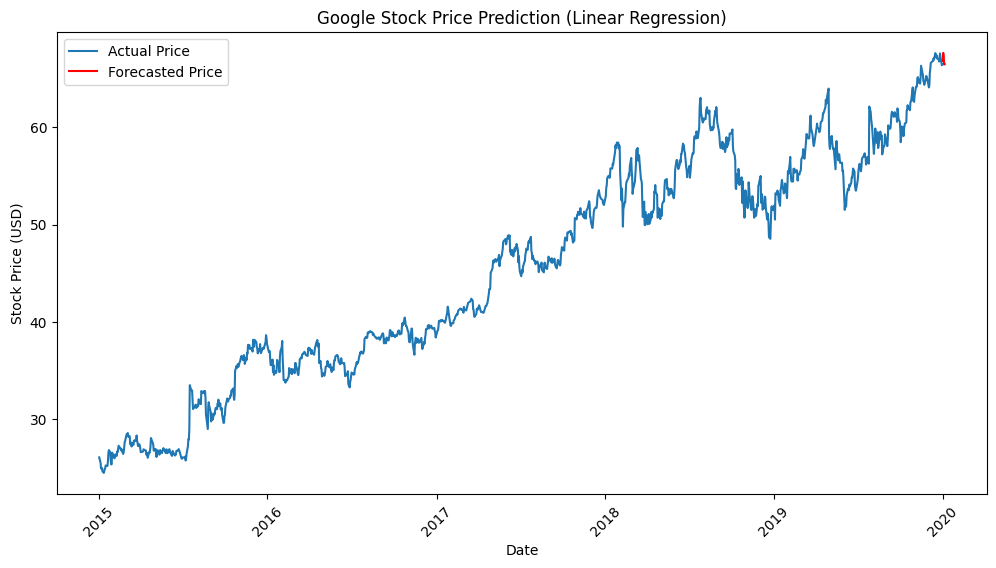

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Add forecasted values with new dates
df['Forecast'] = np.nan

last_date = df['date'].iloc[-1]
last_date = pd.to_datetime(last_date)

# Create new dates for the forecast
forecast_dates = pd.date_range(start=last_date, periods=forecast_out+1, inclusive='right')

forecast_df = pd.DataFrame({'date': forecast_dates, 'Forecast': forecast})

# Plot actual vs forecasted prices
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['close'], label='Actual Price')
plt.plot(forecast_df['date'], forecast_df['Forecast'], label='Forecasted Price', color='red')
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("Google Stock Price Prediction (Linear Regression)")
plt.legend()
plt.xticks(rotation=45)
plt.show()
